In [2]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

2023-03-20 19:31:25.118776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Read the cc_default.csv file from the Resources folder into a Pandas DataFrame
cc_df = pd.read_csv(
    Path("cc_default.csv")
)

# Review the DataFrame
cc_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Define features set X by selecting all columns but DEFAULT
X = cc_df.drop(columns=["DEFAULT"]).copy()

# Display the features DataFrame
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [5]:
# Define target set by selecting the DEFAULT column
y = cc_df["DEFAULT"]

# Display a sample of y
y[:5]

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [6]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [8]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [9]:
# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Define the the number of inputs to the model -- number of X columns in df
number_inputs = 23

# Define the number of hidden nodes for the model - is there a guide/rule of thumb?
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="sigmoid"))

In [15]:
# Display the Sequential model summary
neuron.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                288       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the Sequential model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Fit the model using 100 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 1s 912us/step - loss: 0.5330 - accuracy: 0.7615
Epoch 2/100
704/704 [==============================] - 1s 913us/step - loss: 0.4615 - accuracy: 0.8079
Epoch 3/100
704/704 [==============================] - 1s 927us/step - loss: 0.4534 - accuracy: 0.8119
Epoch 4/100
704/704 [==============================] - 1s 991us/step - loss: 0.4495 - accuracy: 0.8144
Epoch 5/100
704/704 [==============================] - 1s 906us/step - loss: 0.4468 - accuracy: 0.8157
Epoch 6/100
704/704 [==============================] - 1s 923us/step - loss: 0.4445 - accuracy: 0.8176
Epoch 7/100
704/704 [==============================] - 1s 932us/step - loss: 0.4427 - accuracy: 0.8198
Epoch 8/100
704/704 [==============================] - 1s 916us/step - loss: 0.4414 - accuracy: 0.8187
Epoch 9/100
704/704 [==============================] - 1s 973us/step - loss: 0.4400 - accuracy: 0.8201
Epoch 10/100
704/704 [==============================] - 1s 1ms/step - los

In [18]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [19]:
model_plot.head(3)

,loss,accuracy
1,0.532987,0.761467
2,0.461533,0.807867
3,0.453397,0.811867


<AxesSubplot: title={'center': 'Training Data Loss'}>

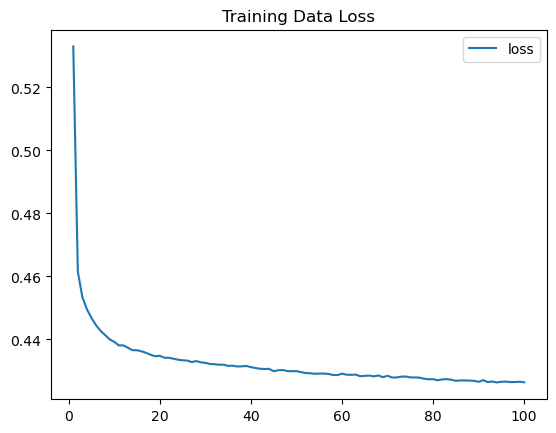

In [33]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(title = "Training Data Loss", y="loss")

<AxesSubplot: title={'center': 'Training Data Accuracy'}>

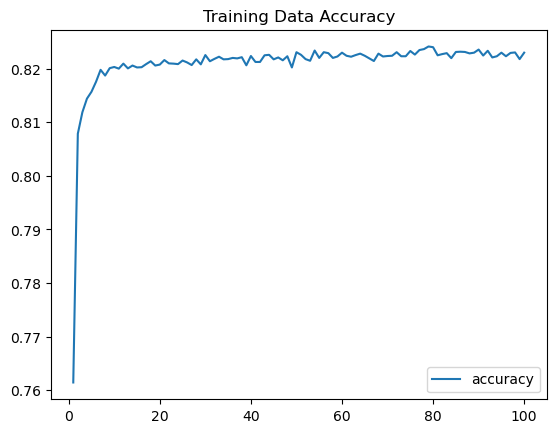

In [35]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(title = "Training Data Accuracy", y="accuracy")

<AxesSubplot: >

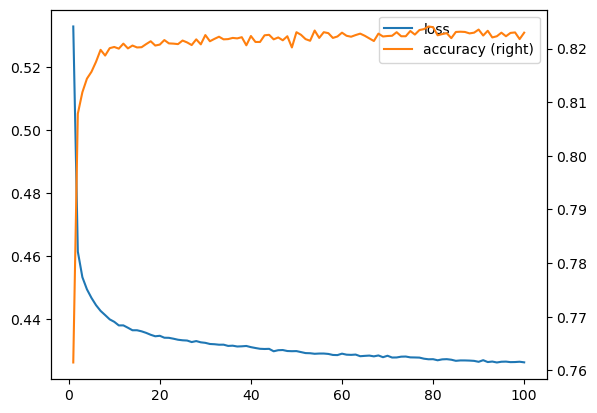

In [31]:
model_plot.plot(secondary_y = "accuracy")

In [22]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 0s - loss: 0.4365 - accuracy: 0.8164 - 282ms/epoch - 1ms/step
Loss: 0.4365297257900238, Accuracy: 0.8163999915122986
